# Storage requirments per image set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
CPU_weight_per_core_per_hour = 1
GPU_weight_per_core_per_hour = 108.2

In [3]:
time_interval = 1  # hr
total_time = 72  # hr
num_timepoints = total_time // time_interval + 1
num_plates = 1
num_wells_per_plate = 60  # 96 well plate
num_fovs_well = 10
image_sets = num_plates * num_wells_per_plate * num_fovs_well

## Compute requirements for 0.1um z-step

In [4]:
image_size_mb_per_slice = 5
slices = 300
channels = 5
masks = 4

image_stack_size_mb = image_size_mb_per_slice * slices
raw_data_size_mb = image_stack_size_mb * channels
total_mb_per_image_set = image_stack_size_mb * channels * masks

total_data_raw_and_processed = raw_data_size_mb + total_mb_per_image_set
print(
    f"Total data size for raw and processed images: {total_data_raw_and_processed} MB"
)

Total data size for raw and processed images: 37500 MB


In [5]:
# CPU
preprocessing_nodes_required = 1
preprocessing_cores_required = 6
preprocessing_time_required = 1  # in hours

In [6]:
# GPU
segmentation_nodes_required = 1
segmentation_cores_required = 16
segmentation_time_required = 3  # in hours

In [7]:
# CPU
featurization_nodes_required = 1
featurization_areasizeshape_cores_required = 8
featurization_areasizeshape_time_required = 0.5  # in hours
featurization_neighbors_cores_required = 8
featurization_neighbors_time_required = 10 / 60  # in hours
featurization_granularity_cores_required = 64
featurization_granularity_time_required = 24  # in hours
featurization_texture_cores_required = 16
featurization_texture_time_required = 2  # in hours
featurization_colocalization_cores_required = 16
featurization_colocalization_time_required = 3  # in hours
featurization_intensity_cores_required = 12
featurization_intensity_time_required = 4  # in hours
# GPU
featurization_sammed3d_cores_required = 12
featurization_sammed3d_time_required = 2  # in hours

In [8]:
# preprocessing (CPU)
preprocessing_SUs = (
    preprocessing_time_required
    * preprocessing_nodes_required
    * preprocessing_cores_required
    * CPU_weight_per_core_per_hour
)
# segmentation (GPU)
segmentation_SUs = (
    segmentation_time_required
    * segmentation_nodes_required
    * segmentation_cores_required
    * CPU_weight_per_core_per_hour
) + (segmentation_time_required * GPU_weight_per_core_per_hour)

In [9]:
# featurization (CPU + GPU)
featurization_SUs = (
    # areasizeshape (CPU)
    (
        featurization_areasizeshape_time_required
        * featurization_nodes_required
        * featurization_areasizeshape_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # neighbors (CPU)
    (
        featurization_neighbors_time_required
        * featurization_nodes_required
        * featurization_neighbors_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # granularity (CPU)
    (
        featurization_granularity_time_required
        * featurization_nodes_required
        * featurization_granularity_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # texture (CPU)
    (
        featurization_texture_time_required
        * featurization_nodes_required
        * featurization_texture_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # colocalization (CPU)
    (
        featurization_colocalization_time_required
        * featurization_nodes_required
        * featurization_colocalization_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # intensity (CPU)
    (
        featurization_intensity_time_required
        * featurization_nodes_required
        * featurization_intensity_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # sammed3d (GPU)
    (
        (featurization_sammed3d_time_required * GPU_weight_per_core_per_hour)
        + (
            featurization_sammed3d_time_required
            * featurization_nodes_required
            * featurization_sammed3d_cores_required
            * CPU_weight_per_core_per_hour
        )
    )
)
featurization_SUs

1909.7333333333333

In [10]:
## Total SUs
total_SUs = preprocessing_SUs + segmentation_SUs + featurization_SUs
print(f"Total SUs required: {int(np.round(total_SUs, 2)):,}")

Total SUs required: 2,288


In [11]:
total_SUs_for_all_image_sets_0_1_um = total_SUs * image_sets
print(
    f"Total SUs required for all image sets: {int(np.round(total_SUs_for_all_image_sets_0_1_um, 0)):,}"
)

Total SUs required for all image sets: 1,373,000


## Compute requirements for 1um z-step

In [12]:
image_size_mb_per_slice = 5
slices = 30
channels = 5
masks = 4

image_stack_size_mb = image_size_mb_per_slice * slices
raw_data_size_mb = image_stack_size_mb * channels
total_mb_per_image_set = image_stack_size_mb * channels * masks

total_data_raw_and_processed = raw_data_size_mb + total_mb_per_image_set
print(
    f"Total data size for raw and processed images: {total_data_raw_and_processed} MB"
)

Total data size for raw and processed images: 3750 MB


In [13]:
# CPU
preprocessing_nodes_required = 1
preprocessing_cores_required = 1
preprocessing_time_required = 0.5  # in hours

In [14]:
# GPU
segmentation_nodes_required = 1
segmentation_cores_required = 6
segmentation_time_required = 1  # in hours

In [15]:
# CPU
featurization_nodes_required = 1
featurization_areasizeshape_cores_required = 2
featurization_areasizeshape_time_required = 0.5  # in hours
featurization_neighbors_cores_required = 1
featurization_neighbors_time_required = 10 / 60  # in hours
featurization_granularity_cores_required = 8
featurization_granularity_time_required = 12  # in hours
featurization_texture_cores_required = 4
featurization_texture_time_required = 1  # in hours
featurization_colocalization_cores_required = 4
featurization_colocalization_time_required = 1.5  # in hours
featurization_intensity_cores_required = 3
featurization_intensity_time_required = 2  # in hours
# GPU
featurization_sammed3d_cores_required = 4
featurization_sammed3d_time_required = 2  # in hours

In [16]:
# preprocessing (CPU)
preprocessing_SUs = (
    preprocessing_time_required
    * preprocessing_nodes_required
    * preprocessing_cores_required
    * CPU_weight_per_core_per_hour
)
# segmentation (GPU)
segmentation_SUs = (
    segmentation_time_required
    * segmentation_nodes_required
    * segmentation_cores_required
    * CPU_weight_per_core_per_hour
) + (segmentation_time_required * GPU_weight_per_core_per_hour)

In [17]:
# featurization (CPU + GPU)
featurization_SUs = (
    # areasizeshape (CPU)
    (
        featurization_areasizeshape_time_required
        * featurization_nodes_required
        * featurization_areasizeshape_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # neighbors (CPU)
    (
        featurization_neighbors_time_required
        * featurization_nodes_required
        * featurization_neighbors_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # granularity (CPU)
    (
        featurization_granularity_time_required
        * featurization_nodes_required
        * featurization_granularity_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # texture (CPU)
    (
        featurization_texture_time_required
        * featurization_nodes_required
        * featurization_texture_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # colocalization (CPU)
    (
        featurization_colocalization_time_required
        * featurization_nodes_required
        * featurization_colocalization_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # intensity (CPU)
    (
        featurization_intensity_time_required
        * featurization_nodes_required
        * featurization_intensity_cores_required
        * CPU_weight_per_core_per_hour
    )
    +
    # sammed3d (GPU)
    (
        (featurization_sammed3d_time_required * GPU_weight_per_core_per_hour)
        + (
            featurization_sammed3d_time_required
            * featurization_nodes_required
            * featurization_sammed3d_cores_required
            * CPU_weight_per_core_per_hour
        )
    )
)
featurization_SUs

337.56666666666666

In [18]:
## Total SUs
total_SUs = preprocessing_SUs + segmentation_SUs + featurization_SUs
print(f"Total SUs required: {total_SUs}")

Total SUs required: 452.26666666666665


In [19]:
total_SUs_for_all_image_sets_1um = total_SUs * image_sets
print(f"Total SUs required for all image sets: {total_SUs_for_all_image_sets_1um}")

Total SUs required for all image sets: 271360.0


## Let us see how much computation is needed for ogranoids in timelapse at 1um z-step

In [27]:
computation_per_timelapse_plate_1um = total_SUs_for_all_image_sets_1um * num_timepoints
print(
    f"Computation per timelapse plate: {int(np.round(computation_per_timelapse_plate_1um, 0)):,} SUs"
)

Computation per timelapse plate: 19,809,280 SUs


# Summary of image sets

In [28]:
print(
    f"For {num_plates} plates - with {num_wells_per_plate} wells per plate and {num_fovs_well} FOVs per well:"
)
print(
    f"Total SUs required for {image_sets} image sets at 0.1 um: {int(np.round(total_SUs_for_all_image_sets_0_1_um, 0)):,}"
)
print(
    f"Total SUs required for {image_sets} image sets at 1 um: {int(np.round(total_SUs_for_all_image_sets_1um, 0)):,}"
)
print(f"For {time_interval} image taken every hour over {total_time} hours:")
print(
    f"Total SUs required for {image_sets} timelapse image sets at 1 um: {int(np.round(computation_per_timelapse_plate_1um, 0)):,}"
)

For 1 plates - with 60 wells per plate and 10 FOVs per well:
Total SUs required for 600 image sets at 0.1 um: 1,373,000
Total SUs required for 600 image sets at 1 um: 271,360
For 1 image taken every hour over 72 hours:
Total SUs required for 600 timelapse image sets at 1 um: 19,809,280


In [39]:
# calculate the number of SUs needed as a function of plates (patients)
output_dict = {
    "plate_number": [],
    "SUs_required": [],
    "type_of_computation": [],
}

for plate_num in range(1, 100):
    output_dict["plate_number"].append(plate_num)
    output_dict["SUs_required"].append(
        int(np.round(total_SUs_for_all_image_sets_1um * plate_num, 0))
    )
    output_dict["type_of_computation"].append("1um")

    output_dict["plate_number"].append(plate_num)
    output_dict["SUs_required"].append(
        int(np.round(total_SUs_for_all_image_sets_0_1_um * plate_num, 0))
    )
    output_dict["type_of_computation"].append("0.1um")

    output_dict["plate_number"].append(plate_num)
    output_dict["SUs_required"].append(
        int(np.round(computation_per_timelapse_plate_1um * plate_num, 0))
    )
    output_dict["type_of_computation"].append("timelapse_1um")

output_df = pd.DataFrame(output_dict)
output_df["SUs_required"] = output_df["SUs_required"] / 1_000_000

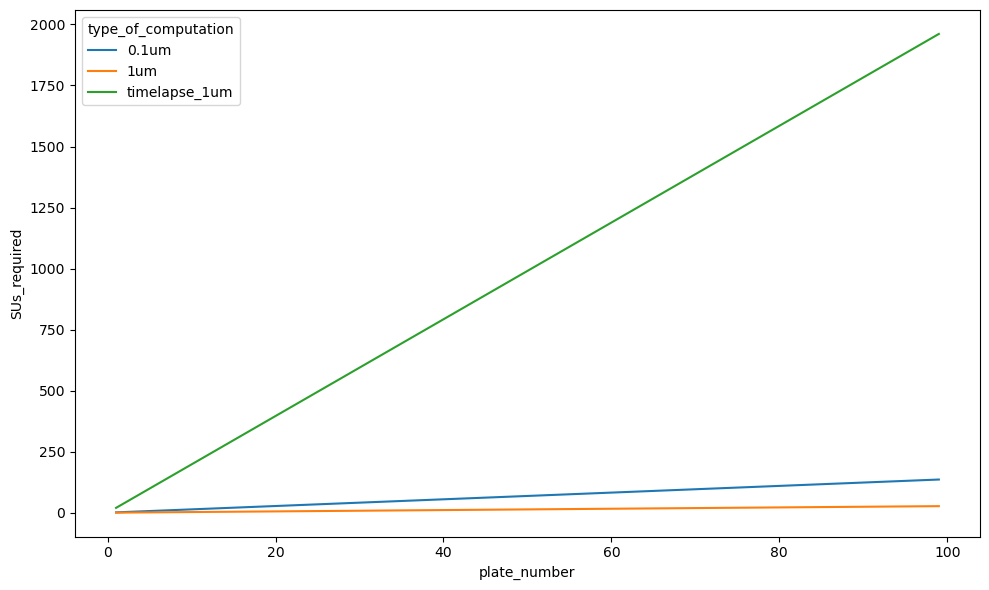

In [ ]:
plt.figure(figsize=(10, 6))

for typ, g in output_df.groupby("type_of_computation"):
    g = g.sort_values("plate_number")
    plt.plot(g["plate_number"], g["SUs_required"], label=typ)

plt.xlabel("plate_number")
plt.ylabel("SUs_required (millions)")
plt.legend(title="type_of_computation")
plt.tight_layout()
plt.show()